In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

Fit Parameter des 1.Fits
a= 3.19430675095 +/- 0.218936414676
b= 2.67760162168 +/- 0.936825554446
_______________________
Fit Parameter des 2.Fits
c= 0.0221769097934 +/- 0.0117359489341
d= 17.8470297496 +/- 0.0947594113073


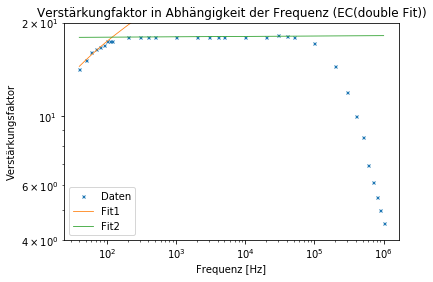

Schnittpunkt => Grenzfrequenz(f_ug)
119.354205772 +/- 53.0235099294

Verstärkung in der Mitte des Plateau Bereiches = [ 18.07169566] +/- [ 0.15203541]

Die fit Parameter des Gesamtfits sind:
V= 18.1030094858 +/- 0.0026275666822
W1= 31.7366972995 +/- 1.3349810339
W2= 266636.253719 +/- 11110759.0858
n1= 0.991374536481 +/- 0.00439382023402
n2= 1.03660706611 +/- 0.000145377367724


G:\Python\lib\site-packages\ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in power


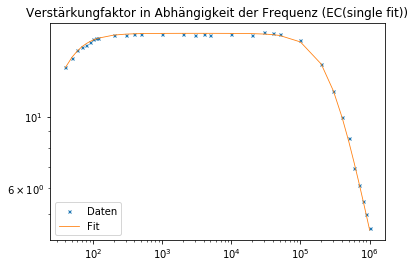

Verstärkung bei omega_g = [ 12.77861855] +/- [ 0.10750527]
omega_g = [ 49.35404388] +/- [ 1.43388024]


In [2]:
#frequency response
#ermitter circuit

#data

nu = np.array([40, 50, 60, 70, 80, 90, 100, 110, 120, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000])
nu_err= 0.00001*nu

U_in = 112
U_in_err = np.array([1.39, 1.49, 1.23, 1.36, 1.50, 1.43, 1.40, 1.34, 1.28, 1.51, 1.41, 1.15, 1.56, 1.20, 1.36, 1.57, 1.24, 1.28, 1.65, 1.35, 1.58, 1.21, 1.71, 1.17, 1.36, 1.20, 1.22, 1.41, 1.41, 1.66, 1.73, 1.28, 1.20])

U_out = np.array([1.59, 1.70, 1.80, 1.84, 1.87, 1.90, 1.95, 1.96, 1.96, 2.01, 2.01, 2.02, 2.02, 2.02, 2.02, 2.01, 2.02, 2.01, 2.02, 2.01, 2.04, 2.03, 2.02, 1.93, 1.63, 1.34, 1.12, 0.961, 0.779, 0.688, 0.615, 0.558, 0.508])
U_out_err = np.array([13.8, 13.9, 7.36, 10.4, 8.76, 12.2, 44.0, 10.7, 8.15, 9.45, 10.2, 7.63, 11.4, 9.77, 10.6, 9.80, 10.9, 10.4, 9.20, 10.6, 19.5, 16.9, 11.1, 10.9, 15.4, 11.5, 10.3, 10.7, 4.77, 4.76, 4.95, 5.70, 4.79])


V_U = U_out/(U_in*10**-3)
V_U_err = np.sqrt((U_out_err/U_in)**2+((U_in_err*10**-3)*U_out/(U_in*10**-3)**2)**2)

         
#plot
plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
#plt.errorbar(nu, V_U, xerr=nu_err, yerr=V_U_err, linestyle='', marker='x', markersize=0.8)        #to small to show
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')


#print('Die Fit Parameter a/b')
#fit func to measured data 0:8
def fit_func_1(nu, a, b):
    return a*np.log(nu)+b



p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func_1, nu[0:8], V_U[0:8])

a=popt[0]
b=popt[1]
a_err=np.sqrt(pcov[0][0])
b_err=np.sqrt(pcov[1][1])

print('Fit Parameter des 1.Fits')
print('a=',a,'+/-',a_err)
print('b=',b,'+/-',b_err)

plt.loglog(nu, fit_func_1(nu, *popt), linewidth=0.8, label='Fit1')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')

print('_______________________')
print('Fit Parameter des 2.Fits')

#fit func to measured data 9:22
def fit_func_2(nu, c, d):
    return c*np.log(nu)+d
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func_2, nu[9:22], V_U[9:22])

c=popt[0]
d=popt[1]
c_err=np.sqrt(pcov[0][0])
d_err=np.sqrt(pcov[1][1])

print('c=',c,'+/-',c_err)
print('d=',d,'+/-',d_err)


#plot fit func
plt.loglog(nu, fit_func_2(nu, *popt), linewidth=0.8, label='Fit2')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.ylim([4E0, 2E1])
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz (EC(double Fit))')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\FP\E 01 - Elektronik Grundpraktikum\freqres.ermitter.double.ET.pdf' ,format='PDF')
plt.show()

#calculating point of intersection (fug)
s=np.exp((d-b)/(a-c))

s_err=np.sqrt(((s*d_err)/(c-a))**2+((s*b_err)/(a-c))**2+(((d-b)*s*c_err)/((c-a)**2))**2+(((d-b)*s*a_err)/((c-a)**2))**2)

print('Schnittpunkt => Grenzfrequenz(f_ug)')
print(s,'+/-',s_err)
print()


#calculating middle of plateau
a=nu[9:10]
b=nu[22:23]
m=a+((b-a)/2)
m_err=np.sqrt((1/2*nu_err[9:10])**2+(1/2*nu_err[22:23])**2)
V_U_m=fit_func_2(m,c,d)
V_U_m_err=np.sqrt((np.log(m)*c_err)**2+(c*m_err/m)**2+(d_err)**2)

print('Verstärkung in der Mitte des Plateau Bereiches =', V_U_m, '+/-', V_U_m_err)


#fit fit_func to measured data
def fit_func(nu,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(nu/W1)**(2*n1))*np.sqrt(1+(nu/W2)**(2*n2)))
p0= [100 , 100 , 100000 , 5 , 5]
popt, pcov = curve_fit(fit_func, nu, V_U , p0, V_U_err)
perr = np.sqrt(np.diag(pcov))
print()
print('Die fit Parameter des Gesamtfits sind:')
print('V=',popt[0],'+/-',pcov[0][0])
print('W1=',popt[1],'+/-',pcov[1][1])
print('W2=',popt[2],'+/-',pcov[2][2])
print('n1=',popt[3],'+/-',pcov[3][3])
print('n2=',popt[4],'+/-',pcov[4][4])

plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
plt.loglog(nu, fit_func(nu, *popt), linewidth=0.8, label='Fit')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz (EC(single fit))')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\FP\E 01 - Elektronik Grundpraktikum/freqres.ermitter.single.ET.pdf' ,format='PDF')
plt.show()

#calculating freqruence omega_g
V_U_omega_g=V_U_m/np.sqrt(2)
V_U_omega_g_err=V_U_m_err/np.sqrt(2)
print('Verstärkung bei omega_g =', V_U_omega_g, '+/-', V_U_omega_g_err)

#expected omega_g<<W2 => approximate nu/W2 = 0

omega_g=popt[1]/((popt[0]/V_U_omega_g)-1)**(1/(2*popt[3]))
omega_g_err=np.sqrt(((pcov[3][3]*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3]))*np.log((popt[0]/V_U_omega_g)**2-1))/(2*popt[3]**2))**2+(pcov[1][1]/(((popt[0]/V_U_omega_g)**2-1)**(1/(2*popt[3]))))**2+((pcov[0][0]*popt[0]*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3])-1))/(popt[3]*V_U_omega_g**2))**2+((V_U_omega_g_err*popt[0]**2*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3])-1))/(popt[3]*V_U_omega_g**3))**2)

print('omega_g =', omega_g, '+/-', omega_g_err)





Fit Parameter des 1.Fits
e= 0.277053222585 +/- 0.0289016150072
f= -0.324789520392 +/- 0.121829899023
____________________
Fit Parameter des 2.Fits
g= 0.00195859738008 +/- 0.000522839710805
h= 0.977259286405 +/- 0.00561199787847


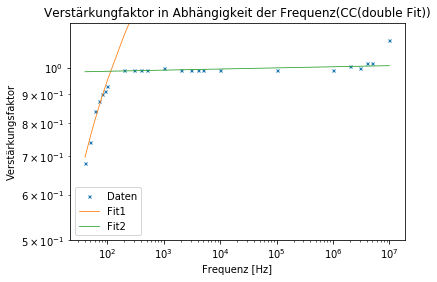

Schnittpunkt => Grenzfrequenz
113.64667752 +/- 75.7177121939

Verstärkung in der Mitte des Plateau Bereiches = [ 1.00747059] +/- [ 0.00982524]

Die fit Parameter des Gesamtfits sind:
V= 1.00516173447 +/- 3.34966138328e-05
W1= 42.8113855973 +/- 1.82131111415


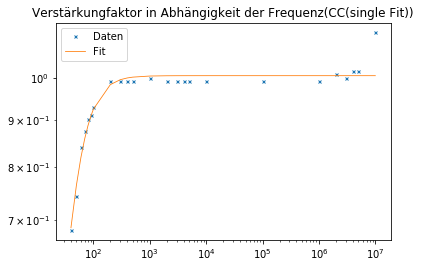

Verstärkung bei omega_g = [ 0.71238929] +/- [ 0.00694749]
omega_g = [ 66.78099274] +/- [ 2.01446432] Hz


In [3]:
#frequency response
#collector circuit

#data

nu = np.array([40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 10000000])
nu_err= 0.00001*nu

U_in = np.array([112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 109, 110, 110, 110, 108])
U_in_err = np.array([1.56, 1.41, 1.03, 1.35, 1.28, 1.67, 1.37, 1.41, 1.48, 1.41, 1.33, 1.26, 1.38, 1.54, 1.45, 1.29, 1.46, 1.63, 1.12, 1.36, 1.54, 1.57, 1.60, 1.61])

U_out = np.array([76.4, 83.2, 94.1, 97.9, 101, 102, 104, 111, 111, 111, 111, 112, 111, 111, 111, 111, 111, 111, 111, 110, 110, 112, 112, 121])
U_out_err = np.array([0.638, 0.965, 1.58, 1.38, 1.55, 0.898, 1.30, 1.03, 1.19, 1.28, 1.39, 1.43, 1.29, 1.31, 1.05, 1.48, 1.65, 1.53, 1.27, 1.40, 1.43, 1.22, 1.54, 1.50])


V_U = U_out/(U_in)
V_U_err = np.sqrt((U_out_err/U_in)**2+((U_in_err)*U_out/(U_in)**2)**2)

#plot
plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
#plt.errorbar(nu, V_U, xerr=nu_err, yerr=V_U_err, linestyle='', marker='x', markersize=0.8)        #to small to show
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz(CC(double Fit))')

print('Fit Parameter des 1.Fits')
#fit func to measured data 0:7
def fit_func1(nu, e, f):
    return e*np.log(nu)+f

p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func1, nu[0:7], V_U[0:7])

e=popt[0]
f=popt[1]
e_err=np.sqrt(pcov[0][0])
f_err=np.sqrt(pcov[1][1])

print('e=',e,'+/-',e_err)
print('f=',f,'+/-',f_err)

plt.loglog(nu, fit_func_1(nu, *popt), linewidth=0.8, label='Fit1')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz(CC(double Fit))')

print('____________________')

print('Fit Parameter des 2.Fits')
#fit func to measured data 8:23
def fit_func2(nu, g, h):
    return g*np.log(nu)+h
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func2, nu[8:23], V_U[8:23])

g=popt[0]
h=popt[1]
g_err=np.sqrt(pcov[0][0])
h_err=np.sqrt(pcov[1][1])

print('g=',g,'+/-',g_err)
print('h=',h,'+/-',h_err)

#plot fit func
plt.loglog(nu, fit_func_2(nu, *popt), linewidth=0.8, label='Fit2')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.ylim([0.5, 1.2])
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz(CC(double Fit))')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\FP\E 01 - Elektronik Grundpraktikum/freqres.collect.double.ET.pdf' ,format='PDF')
plt.show()

#calculating point of intersection
s=np.exp((h-f)/(e-g))

s_err=np.sqrt(((s*h_err)/(g-e))**2+((s*f_err)/(e-g))**2+(((h-f)*s*g_err)/((g-e)**2))**2+(((h-f)*s*e_err)/((g-e)**2))**2)


print('Schnittpunkt => Grenzfrequenz')
print(s, '+/-', s_err)

#calculating middle of plateau
a=nu[7:8]
b=nu[23:24]
m=a+((b-a)/2)
m_err=np.sqrt((1/2*nu_err[7:8])**2+(1/2*nu_err[23:24])**2)

V_U_m=fit_func_2(m,g,h)
V_U_m_err=np.sqrt((np.log(m)*g_err)**2+(g*m_err/m)**2+(h_err)**2)

print()
print('Verstärkung in der Mitte des Plateau Bereiches =', V_U_m, '+/-', V_U_m_err)

#fit fit_func to measured data
def fit_func(nu,V,W1):
    n1=1
    n2=1
    
#    print('________')
#    print(V)
#    print(W1)
#    print(W2)
#    print(n1)
#    print(n2)
    return V/(np.sqrt(1+1/(nu/W1)**(2*n1)))
p0= [1, 42]
popt, pcov = curve_fit(fit_func, nu[0:30], V_U[0:30] , p0, V_U_err[0:30])
#perr = np.sqrt(np.diag(pcov))
print()
print('Die fit Parameter des Gesamtfits sind:')
print('V=',popt[0],'+/-',pcov[0][0])
print('W1=',popt[1],'+/-',pcov[1][1])
#print('W2=',popt[2],'+/-',pcov[2][2])
#print('n1=',popt[3],'+/-',pcov[3][3])
#print('n2=',popt[4],'+/-',pcov[4][4])




plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
plt.loglog(nu, fit_func(nu, *popt), linewidth=0.8, label='Fit')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz(CC(single Fit))')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\FP\E 01 - Elektronik Grundpraktikum/freqres.collect.single.ET.pdf' ,format='PDF')
plt.show()


#calculating freqruence omega_g
V_U_omega_g=V_U_m/np.sqrt(2)
V_U_omega_g_err=V_U_m_err/np.sqrt(2)
print('Verstärkung bei omega_g =', V_U_omega_g, '+/-', V_U_omega_g_err)

#expected omega_g<<W2 => approximate nu/W2 = 0

#omega_g=popt[1]/((popt[0]/V_U_omega_g)-1)**(1/(2*popt[3]))
#omega_g_err=np.sqrt(((pcov[3][3]*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3]))*np.log((popt[0]/V_U_omega_g)**2-1))/(2*popt[3]**2))**2+(pcov[1][1]/(((popt[0]/V_U_omega_g)**2-1)**(1/(2*popt[3]))))**2+((pcov[0][0]*popt[0]*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3])-1))/(popt[3]*V_U_omega_g**2))**2+((V_U_omega_g_err*popt[0]**2*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2*popt[3])-1))/(popt[3]*V_U_omega_g**3))**2)

#print('omega_g =', omega_g, '+/-', omega_g_err)

omega_g=popt[1]/((popt[0]/V_U_omega_g)-1)**(1/(2))
omega_g_err=np.sqrt(((pcov[1][1]/(((popt[0]/V_U_omega_g)**2-1)**(1/(2))))**2+((pcov[0][0]*popt[0]*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2)-1))/(V_U_omega_g**2))**2+((V_U_omega_g_err*popt[0]**2*popt[1]*((popt[0]/V_U_omega_g)**2-1)**(-1/(2)-1))/(V_U_omega_g**3))**2))

print('omega_g =', omega_g, '+/-', omega_g_err, 'Hz')